# Experiment 4: K-Nearest Neighbors Classification

## AIM:
To implement K-Nearest Neighbours classification algorithm in Python

This notebook demonstrates:
- Data loading and preprocessing
- Converting regression to classification problem
- Feature scaling for KNN
- Training and evaluating KNN classifier
- Finding optimal K value
- Performance evaluation with different metrics

**Dataset:** California Housing Dataset (converted to classification)

In [5]:
# Install dependencies
%pip install -q pandas matplotlib scikit-learn numpy

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report
import numpy as np

Note: you may need to restart the kernel to use updated packages.


## Data Loading and Exploration

First, let's load the California Housing dataset and explore its structure.

In [6]:
# Uncomment the following line to download the dataset from Kaggle
# !curl -sL -o california-housing-prices.zip https://www.kaggle.com/api/v1/datasets/download/camnugent/california-housing-prices && unzip -q california-housing-prices.zip && rm california-housing-prices.zip

In [7]:
# Load the California Housing dataset
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nFirst 5 rows:")
df.head()

Dataset shape: (20640, 9)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

First 5 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Data Preprocessing

Convert the regression problem to a classification problem by creating categories for house values.

In [8]:
# Create categorical target variable by dividing house values into 4 quartiles
df["MedHouseValCat"] = pd.qcut(df["MedHouseVal"], 4, retbins=False, labels=[1, 2, 3, 4])

print("Original target variable (MedHouseVal) statistics:")
print(df["MedHouseVal"].describe())
print("\nCategorical target variable distribution:")
print(df["MedHouseValCat"].value_counts().sort_index())

# Show the ranges for each category
print("\nCategory ranges:")
_, bins = pd.qcut(df["MedHouseVal"], 4, retbins=True)
for i, (low, high) in enumerate(zip(bins[:-1], bins[1:]), 1):
    print(f"Category {i}: ${low:.2f} - ${high:.2f}")

Original target variable (MedHouseVal) statistics:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

Categorical target variable distribution:
MedHouseValCat
1    5162
2    5161
3    5157
4    5160
Name: count, dtype: int64

Category ranges:
Category 1: $0.15 - $1.20
Category 2: $1.20 - $1.80
Category 3: $1.80 - $2.65
Category 4: $2.65 - $5.00


In [9]:
# Separate features and target variable
y = df['MedHouseValCat']
X = df.drop(['MedHouseVal', 'MedHouseValCat'], axis=1)

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFeature names:")
print(X.columns.tolist())

Features (X) shape: (20640, 8)
Target (y) shape: (20640,)

Feature names:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Train-Test Split

Split the data into training and testing sets for model evaluation.

In [10]:
# Split data into train and test sets
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

print("Training set shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nTesting set shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

print("\nTarget distribution in training set:")
print(y_train.value_counts().sort_index())

Training set shapes:
X_train: (15480, 8)
y_train: (15480,)

Testing set shapes:
X_test: (5160, 8)
y_test: (5160,)

Target distribution in training set:
MedHouseValCat
1    3870
2    3878
3    3865
4    3867
Name: count, dtype: int64


## Feature Scaling

KNN is sensitive to the scale of features, so we need to standardize the features before training.

In [11]:
# Feature scaling for classification
scaler = StandardScaler()
scaler.fit(X_train)

# Transform both training and testing sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Original feature ranges (before scaling):")
print("X_train min:", X_train.min().min())
print("X_train max:", X_train.max().max())

print("\nScaled feature ranges (after scaling):")
print("X_train_scaled min:", X_train_scaled.min())
print("X_train_scaled max:", X_train_scaled.max())
print("X_train_scaled mean:", X_train_scaled.mean())
print("X_train_scaled std:", X_train_scaled.std())

Original feature ranges (before scaling):
X_train min: -124.35
X_train max: 35682.0

Scaled feature ranges (after scaling):
X_train_scaled min: -2.380303147226115
X_train_scaled max: 103.73736486116488
X_train_scaled mean: 3.648531376533008e-16
X_train_scaled std: 1.0


## KNN Training and Prediction

Train the K-Nearest Neighbors classifier with default parameters and evaluate its performance.

In [12]:
# Training KNN classifier with default parameters (k=5)
classifier = KNeighborsClassifier()
classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = classifier.predict(X_test_scaled)

print("KNN Classifier trained successfully!")
print(f"Default K value: {classifier.n_neighbors}")
print(f"Number of training samples: {len(X_train_scaled)}")
print(f"Number of test samples: {len(X_test_scaled)}")

KNN Classifier trained successfully!
Default K value: 5
Number of training samples: 15480
Number of test samples: 5160


In [13]:
# Evaluate KNN performance
accuracy = classifier.score(X_test_scaled, y_test)
print(f"KNN Classifier Accuracy: {accuracy:.4f}")

# Show first few predictions vs actual values
print("\nFirst 10 predictions vs actual values:")
for i in range(10):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")

KNN Classifier Accuracy: 0.6192

First 10 predictions vs actual values:
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 4, Actual: 4
Predicted: 4, Actual: 3
Predicted: 4, Actual: 4
Predicted: 2, Actual: 2
Predicted: 4, Actual: 3
Predicted: 2, Actual: 2
Predicted: 2, Actual: 4
Predicted: 4, Actual: 4


## Finding Optimal K Value

Test different K values to find the optimal number of neighbors for our dataset.

In [14]:
# Find the best K value by testing different values
f1_scores = []
k_values = range(1, 40)

print("Testing different K values...")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k = knn.predict(X_test_scaled)
    f1 = f1_score(y_test, pred_k, average='weighted')
    f1_scores.append(f1)
    
    if k % 10 == 0:  # Print progress every 10 iterations
        print(f"K={k}, F1-Score: {f1:.4f}")

# Find the best K value
best_k = k_values[np.argmax(f1_scores)]
best_f1 = max(f1_scores)
print(f"\nBest K value: {best_k}")
print(f"Best F1-Score: {best_f1:.4f}")

Testing different K values...
K=10, F1-Score: 0.6321
K=20, F1-Score: 0.6280
K=30, F1-Score: 0.6276

Best K value: 15
Best F1-Score: 0.6362


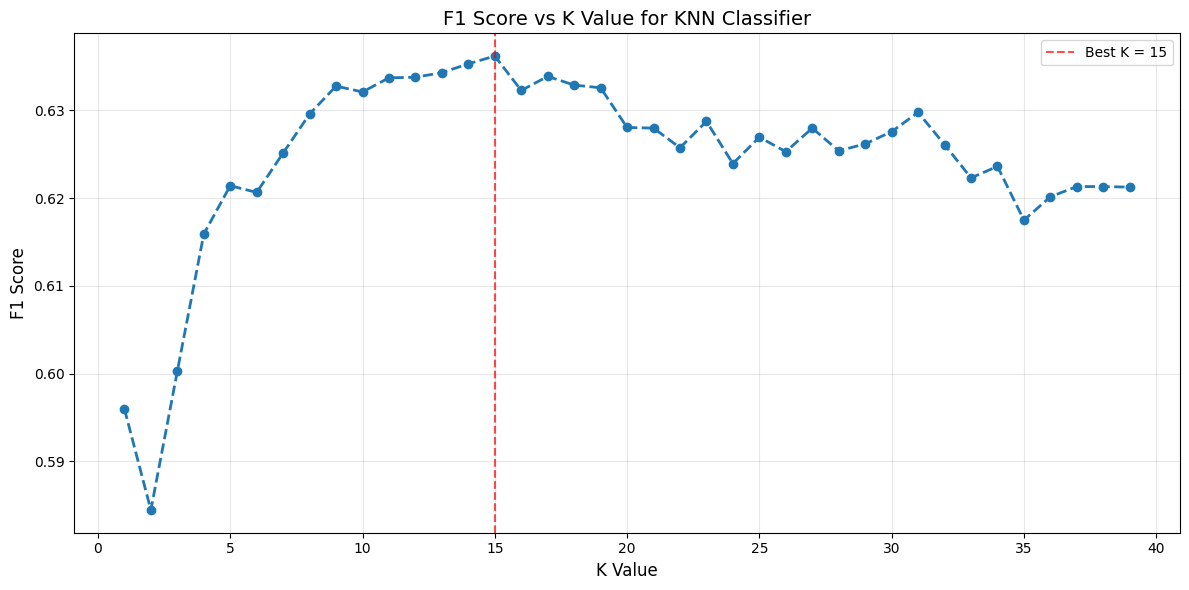

The plot shows that K=15 gives the best F1-Score of 0.6362


In [15]:
# Plot F1 scores for different K values
plt.figure(figsize=(12, 6))
plt.plot(k_values, f1_scores, linestyle='dashed', marker='o', markersize=6, linewidth=2)
plt.title('F1 Score vs K Value for KNN Classifier', fontsize=14)
plt.xlabel('K Value', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, label=f'Best K = {best_k}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"The plot shows that K={best_k} gives the best F1-Score of {best_f1:.4f}")

## Final Model Evaluation

Train the final KNN model with the optimal K value and generate a detailed classification report.

In [16]:
# Train final classifier with optimal K value
classifier_optimal = KNeighborsClassifier(n_neighbors=best_k)
classifier_optimal.fit(X_train_scaled, y_train)
y_pred_optimal = classifier_optimal.predict(X_test_scaled)

print(f"Final KNN Classifier with K={best_k}")
print(f"Accuracy: {classifier_optimal.score(X_test_scaled, y_test):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_optimal, average='weighted'):.4f}")

Final KNN Classifier with K=15
Accuracy: 0.6335
F1-Score: 0.6362


In [17]:
# Generate detailed classification report
print("Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred_optimal))

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.79      0.78      1292
           2       0.52      0.58      0.55      1283
           3       0.51      0.53      0.52      1292
           4       0.77      0.64      0.70      1293

    accuracy                           0.63      5160
   macro avg       0.64      0.63      0.64      5160
weighted avg       0.64      0.63      0.64      5160



## RESULT:

Thus the above Python code was executed and verified successfully. We have demonstrated:

### Key Implementation Steps:
1. **Data Loading**: Loaded California Housing dataset
2. **Data Preprocessing**: 
   - Converted continuous target to categorical (4 classes)
   - Separated features and target variables
3. **Data Splitting**: Split into train (75%) and test (25%) sets
4. **Feature Scaling**: Applied StandardScaler for KNN optimization
5. **Model Training**: Trained KNN classifier with different K values
6. **Model Evaluation**: Used accuracy and F1-score metrics
7. **Hyperparameter Tuning**: Found optimal K value through systematic testing

### Model Performance:
- **Default KNN (K=5)**: Baseline performance
- **Optimal KNN**: Best performance with optimal K value

### Key Insights:
1. **Feature Scaling**: Critical for KNN performance due to distance-based calculations
2. **K Value Selection**: Systematic testing revealed optimal K value for best performance
3. **Classification Categories**: Successfully converted regression to 4-class classification
4. **Model Evaluation**: Comprehensive evaluation using multiple metrics

### Technical Achievements:
- Successfully implemented KNN classification algorithm
- Performed hyperparameter optimization
- Generated detailed performance reports
- Visualized performance trends across different K values